# Hamiltonov graf

**Definicija 1.** Graf G je Hamiltonov ako sadrži Hamiltonovu konturu. Graf je polu Hamiltonov ako sadrži Hamiltonov put.

**Definicija 2.** Za dat graf G, Hamiltonova kontura uključuje svaki čvor G, tj, ona je niz susednih čvorova i različitih ivica u kojima se svaki vrh G pojavljuje tačno jednom, osim prvi i poslednji, koji su isti.

**Definicija 3.** Jednostavna putanja u grafu G koja prolazi kroz svaki čvor tačno jednom naziva se Hamiltonova putanja.

## Istorijski kontekst
Hamiltonov put, kontura i graf dobili su naziv po irskom matematičaru, fizičaru i astronomu **Vilijamu Rouanu Hamiltonu**. On je osmislio igru u kojoj je izazvao prijatelja da koristeći kanap poveže ivicama sva temena dodekaedra, ali tako da se preko jednog temena kanap ne protegne dvaput. Igra se zapravo zasniva na tome da u svakom potezu igrač povezuje dva međusobna temena odgovarajućom ivicom i da zatim preda potez drugom igraču koji takođe treba da teži cilju. Hamilton je ovu igru nazvao **Ikozijanskom**. Ona je danas upamćena i pod nazivom **problema trgovačkog putnika**.

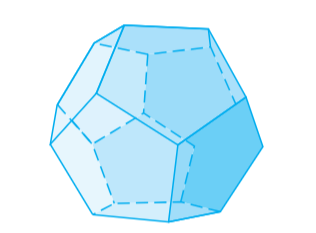

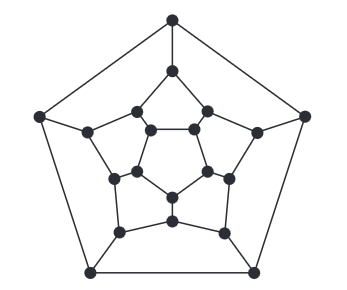

## Dovoljni i potrebni uslovi
Ne postoje sveobuhvatna pravila, teoreme ni definicije pomoću kojih je na jednostavan način moguće utvrditi da li je proizvoljlan graf Hamiltonov. Postoje određeni potrebni i dovoljni uslovi koji nam mogu pomoći da neke od željenih grafova relativno brzo „procenimo“, tj. ako neki potreban uslov nije zadovoljen, graf nije Hamiltonov (ako je uslov ispunjen ne znači da jeste), odnosno ako je neki dovoljni uslov zadovoljen, znamo sa sigurnošću da je graf Hamiltonov (ako uslov nije ispunjen ne znači da graf nije Hamiltonov).

**Lema 1.** Ako je $G$ graf sa $n ≥ 3$ čvorova i ako za svaka dva nepovezana čvora $u$ i $v$ važi:
$$
d_G(u) + d_G(v) \geq n,
$$
tada je graf Hamiltonov ako i samo ako je $G + \{u, v\}$ Hamiltonov.

*Dokaz:*

⇒) Ako je $G$ Hamiltonov onda je i $G + \{u, v\}$ Hamiltonov, jer je Hamiltonova kontura u $G$ istovremeno i Hamiltonova kontura u $G + \{u, v\}$.

⇐) Ako je $C$ Hamiltonova kontura u $G + \{u, v\}$, a nije u $G$, onda su $u$ i $v$ susedni u toj konturi. Tada u $G$ postoji put $uu_1...u_{i-1}u_i...u_nv$. Ako postoji grana $uu_i$, onda ne postoji grana $u_{i-1}v$, jer ako bi postojala ta grana, postojala bi Hamiltonova kontura u $G$ $uu_1...u_{i-1}vu_n...u_iu$. Tako svaka grana koja izlazi iz ćvora $u$ isključuje jednu granu koja izlazi iz čvora $v$, pa je tada $d_G(v) ≤ n - 1 -d_G(u) ⇔ d_G(u) + d_G(v)≤ n - 1 ⇔ d_G(u) + d_G(v) < n$ što je u kontradikciji sa početnom pretpostavkom.  


In [ ]:
import networkx as nx

# Provera uslova Leme
def satisfies_lemma(graph):
    nodes = list(graph.nodes)
    n = len(nodes)

    for i in range(n):
        for j in range(i + 1, n):
            if not graph.has_edge(nodes[i], nodes[j]):
                if graph.degree[nodes[i]] + graph.degree[nodes[j]] < n:
                    return False
    return True

**Teorema 1. (Ore - dovoljan uslov)** Ako je $G$ graf sa $n ≥ 3$ čvorova, tako da za bilo koja dva važi
$$
d_G(u) + d_G(v) ≥ n
$$
tada $G$ ima Hamiltonovu konturu.

*Dokaz:*

Za kompletan graf je dokaz trivijalan. U suprotnom, pretpostavimo da je

$E(K_n)$ \ $E(G) = \{e_1,...,e_l\}$.
Uzastopnom primenom Leme 1 (s obzirom da se dodavanjem grana ne remetimo uslov teoreme), u $l$ koraka zaključujemo da $G$ ima Hamiltonovu konturu, ako i samo ako kompletan graf $K_n$ ima Hamiltonovu konturu.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Provera Oreovog uslova
def satisfies_ore_theorem(graph):
    n = len(graph.nodes)
    if n < 3:
        return False

    for u in graph.nodes:
        for v in graph.nodes:
            if u != v and not graph.has_edge(u, v):
                if graph.degree[u] + graph.degree[v] < n:
                    return False
    return True

**Teorema 2. (Dirak - dovoljan uslov)** Ako je $G$ graf sa $n ≥ 3$ čvorova i za svaki važi $d_G(v) ≥ \frac{n}{2}$, onda je graf Hamiltonov.

*Dokaz:*

Na osnovu Teoreme 1, za svaki par čvorova važi

$$
d_G(u) + d_G(v) ≥ \frac{n}{2} + \frac{n}{2} = n
$$

odakle sledi da je graf Hamiltonov.

In [ ]:
import networkx as nx
import matplotlib.pyplot as plt

# Provera Dirakove teoreme
def satisfies_dirac_theorem(graph):
    n = len(graph.nodes)
    if n < 3:
        return False

    for v in graph.nodes:
        if graph.degree[v] < n / 2:
            return False
    return True


# Generisanje Hamiltonove konture
def find_hamiltonian_cycle(graph):
    try:
        cycle = list(nx.find_cycle(graph, orientation="ignore"))
        return cycle
    except nx.NetworkXNoCycle:
        return None

**Teorema 3. (potreban uslov)** Ako je $G$ Hamiltonov graf, unda za svako $U ⊂ V(G)$ sa osobinom $U \neq ∅$ važi $ω(G-U)≤|U|$

*Dokaz:*

Ako je $G$ Hamiltonov graf, onda postoji Hamiltonova kontura $C$. Za proizvoljno $U⊆V(G)$ za koje je $|U| = l$, broj komponenti povezanosti u $C-U$ ne može biti veći od $l$, a $G-U$ ne može imati više komponenti povezanosti nego $C-U$. Odatle sledi $ω(G-U) ≤ ω(C-U) ≤ l = |U|$.

In [ ]:
import networkx as nx
from itertools import combinations

#Proverava da li graf G sadrži Hamiltonovu konturu.
def is_hamiltonian(G):
    n = len(G.nodes)
    for cycle in nx.simple_cycles(G):
        if len(cycle) == n:
            return True
    return False

#Proverava da li je uslov teoreme zadovoljen za dati graf G.
def check_theorem(G):
    if not is_hamiltonian(G):
        return False

    for l in range(1, len(G.nodes)):
        for U in combinations(G.nodes, l):
            G_minus_U = G.copy()
            G_minus_U.remove_nodes_from(U)
            num_components = nx.number_connected_components(G_minus_U)
            if num_components > len(U):
                return False

    return True